# Apply the model on evaluation set

## Import functions 

#### <span style="color:blue">*JUST RUN CELL*</span>


In [1]:
import os 
import sys
import numpy as np
#os.chdir(os.path.join("/home/datawork-osmose/",'osmoseNotebooks_v0','source'))

with open('path_codes.txt') as f:
    codes_path = f.readlines()[0]
os.chdir(os.path.join(codes_path))

from apply_model_on_eval_set import load_model_hyperparameters, apply_model_on_eval_set_main 
from use_network_functions import show_epoch_loss, set_epoch
from launcher_datasetScale import list_datasets
from check_files_in_ai_folders import check_available_ai_tasks_benchmark_modeltrainned


## Selection of task, benchmark and model

In [2]:
check_available_ai_tasks_benchmark_modeltrainned()

/
TaskTEST1/
    BMTEST1_1/
        models/
            model1/
            model2/
            model3/
Task_Glider_PBW_AnnotatorAnalysis/
    BM_merged15/
        models/
            m1/
    BM_EXP/
        models/
            m1/
    Comp_BM_curves/
    BM_merged6/
        models/
            m1/
    BM_merged2_2/
        models/
            m1/
    BM_merged2_3/
        models/
            m1/
    BM_merged2_4/
        models/
            m1/
    BM_merged2_5/
        models/
            m1/
    BM_merged2_6/
        models/
            m1/
    BM_merged2_7/
        models/
            m1/
    BM_merged2_8/
        models/
            m1/
    BM_merged8/
        models/
            m1/
    BM_merged10/
        models/
            m1/
    BM_merged12/
        models/
            m1/
    BM_merged14/
        models/
            m1/
    BM_merged2_9/
        models/
            m1/
    BM_merged2_10/
        models/
            m1/
    WeakLabelling_AllAnnotation/
        models/
     

#### <span style="color:red">*Select your task and benchmark among those already created*</span>

Ex : 
- ``Task_ID`` = 'TaskTEST1'
- ``BM_Name`` = 'BMTEST1_1'
- ``VersionName`` = 'model1' 

In [22]:
Task_ID = 'Task_DS_Miller'
BM_Name = 'All_BlueWhale'

Version_name = 'm2'

## Print Parameters

Nb : mettre ici le choix de l'epoch à conserver !

#### <span style="color:blue">*JUST RUN CELL*</span>

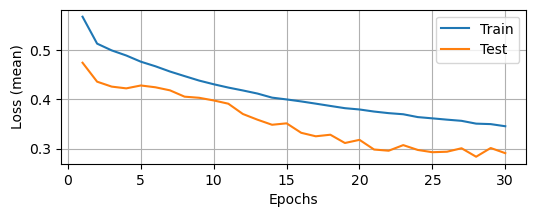

In [23]:
show_epoch_loss(Task_ID, BM_Name, Version_name)

In [24]:
ID_epoch_for_evaluation = 30

In [25]:
set_epoch(Task_ID, BM_Name, Version_name, ID_epoch_for_evaluation)

In [26]:
parameters = load_model_hyperparameters(Task_ID, BM_Name, Version_name)

for item in list(parameters.keys()):
    print(item, ' : ', parameters[item])

TrainsetRatio  :  0.9
batch_size  :  20
learning_rate  :  0.0001
num_epochs  :  30
shuffle  :  True
use_pretrained  :  False
input_data_format  :  audio
nfft  :  [512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512]
window_size  :  [512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512]
overlap  :  [92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92]
dynamic_min  :  [-20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20]
dynamic_max  :  [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
scaling  :  ['spectrum', 'spectrum', 'spectrum', 'spectrum', 'spectrum', 'spectrum', 'spectrum', 'spectrum', 'spectrum', 'spectrum', 'spectrum']
num_classes  :  1
sample_rate  :  [250 250 250 250 250 250 250 250 250 250 250]
dataset_ID_tab  :  ['BlueFinLibrary_BallenyIslands2015'
 'BlueFinLibrary_ElephantIsland2013Aural'
 'BlueFinLibrary_ElephantIsland2014' 'BlueFinLibrary_Greenwich64S2015'
 'BlueFinLibrary_MaudRise2014' 'BlueFinLibrary_RossSea2014'
 'BlueFinLibrary_casey2014' 'BlueFinLibrary_casey2017'
 'BlueFinLi

## Launch Evaluation

#### <span style="color:blue">*JUST RUN CELL*</span>

Nb : LabelsList, labels and outputs are returned in case you want to apply your own computation metrics

Nb : new release : add an output_list to select wich merics(s) use

Checking paths and loadings parameters and model ...
Done
Applying model on evaluation set ...


100%|██████████| 107610/107610 [13:40<00:00, 131.21it/s]


Done


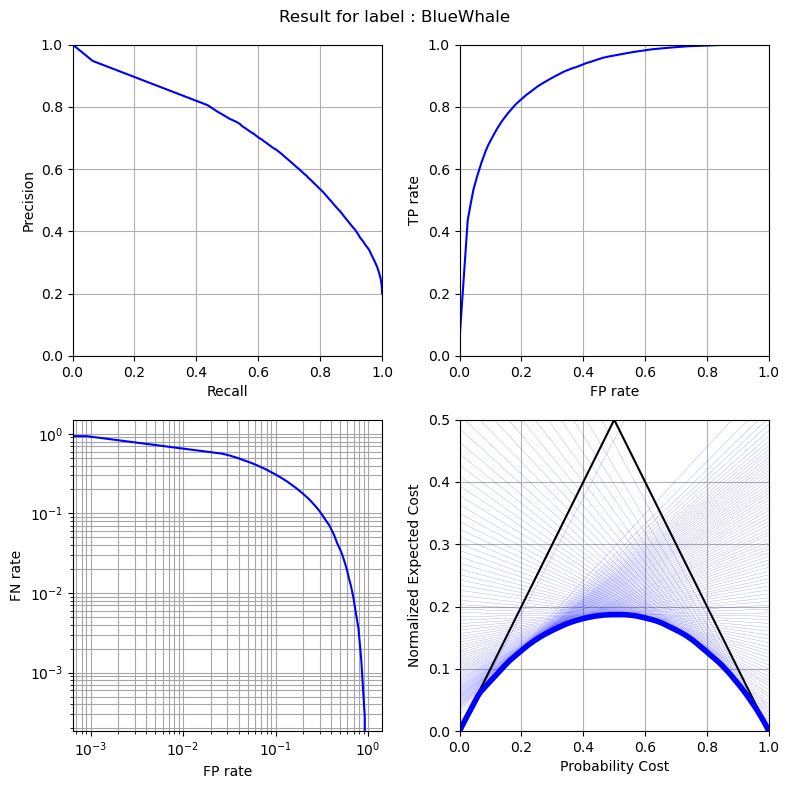

In [27]:
LabelsList, labels, outputs, datasets = apply_model_on_eval_set_main(Task_ID, BM_Name, Version_name, ID_epoch_for_evaluation)

BlueFinLibrary_kerguelen2005: 100%|██████████| 107610/107610 [00:00<00:00, 1195617.13it/s]


11652


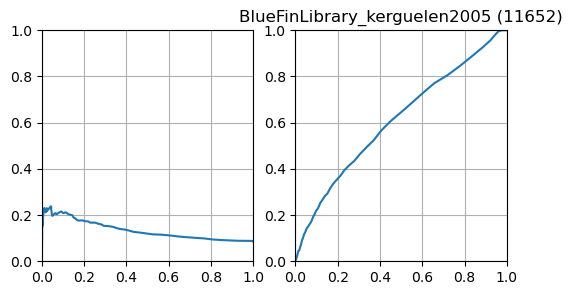

In [17]:
import matplotlib.pyplot as plt
from evaluation_metrics import ComputeEvaluationMetrics, plot_PR_curve, plot_ROC_curve, plot_DET_curve, plot_COST_curve, plot_4_curves
from tqdm import tqdm

dataset_ID_tab = parameters['dataset_ID_tab']

for dataset in (dataset_ID_tab[8:9]):
    outputs_d = np.array([])
    labels_d = np.array([])
    for i in tqdm(range(len(datasets)), desc=dataset):
        if datasets[i] == dataset:
            outputs_d = np.concatenate((outputs_d, outputs[i]))
            labels_d = np.concatenate((labels_d, labels[i]))
    
    outputs_d = outputs_d[:, np.newaxis]
    labels_d = labels_d[:, np.newaxis]
    print(len(outputs_d))
    Recall, Precision, FP_rate, TP_rate, FN_rate, NormalizedExpectedCost, ProbabilityCost, threshold_array = ComputeEvaluationMetrics(LabelsList, labels_d, outputs_d)

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.plot(Recall, Precision)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.grid()
    plt.subplot(1,2,2)
    plt.plot(FP_rate, TP_rate)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(dataset + ' ('+str(len(outputs_d))+')')
    plt.grid()

(0.0, 8000.0)

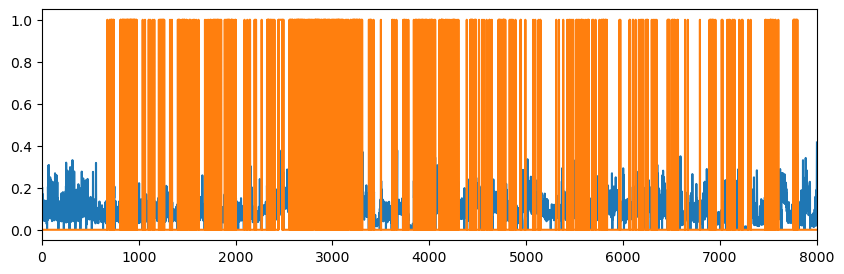

In [21]:
plt.figure(figsize=(10,3))
plt.plot(outputs_d)
plt.plot(labels_d)
k = 0
plt.xlim([0+k,8000+k])

In [38]:
labels

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
from evaluation_metrics import ComputeEvaluationMetrics, plot_PR_curve, plot_ROC_curve, plot_DET_curve, plot_COST_curve, plot_4_curves

Recall, Precision, FP_rate, TP_rate, FN_rate, NormalizedExpectedCost, ProbabilityCost, threshold_array = ComputeEvaluationMetrics(LabelsList, labels, outputs)


In [ ]:
import sklearn
sklearn.metrics.auc(FP_rate, TP_rate)

In [79]:
AP = np.sum((Recall[:-1] - Recall[1:]) * Precision[:-1])
AP

0.8934516664025749

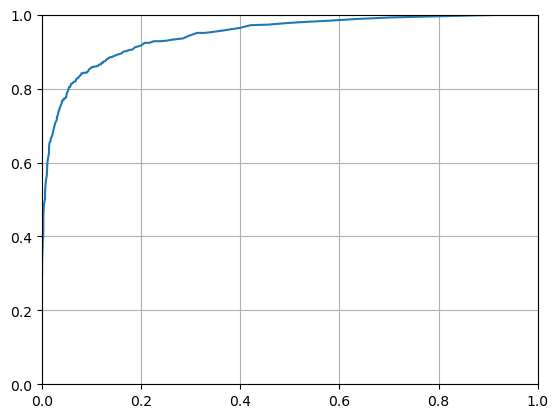

In [80]:
import matplotlib.pyplot as plt
plt.plot(FP_rate, TP_rate)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid()

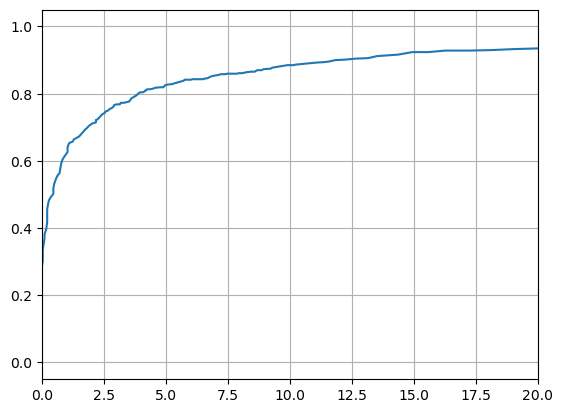

In [81]:
plt.plot(FP_rate * 72 , TP_rate) 
plt.xlim([0,20])
plt.grid()

(15000.0, 17000.0)

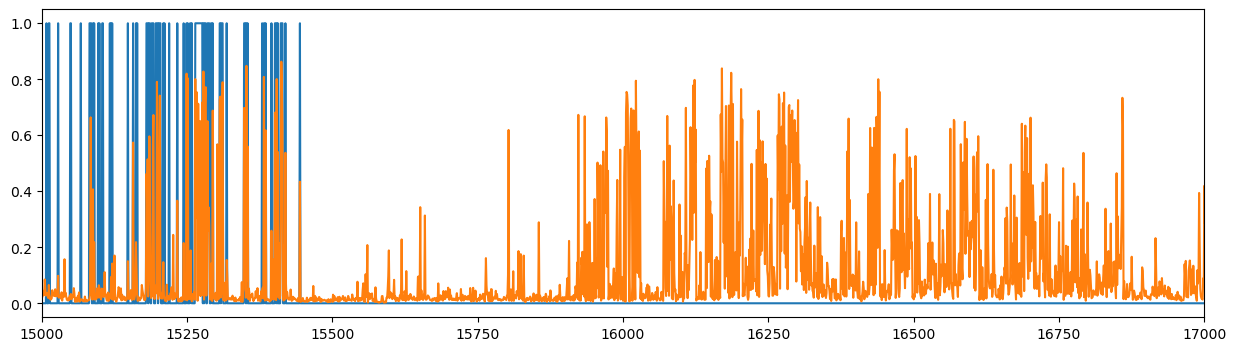

In [82]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,4))
x = 15000
plt.plot(labels)
plt.plot(outputs)
plt.xlim([0+x,2000+x])